In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import IPython.display as ipd

import numpy as np
import librosa
import librosa.display

In [22]:
ESData = pd.read_csv("/home/hood/My repo/Strive-Capestone/Data/archive/esc50.csv")
ESData.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [41]:
# Getting the mapping of the categories 

categories = pd.Categorical(ESData["category"])
categories_mapping = dict(enumerate(categories.categories))
print(categories_mapping)


{0: 'airplane', 1: 'breathing', 2: 'brushing_teeth', 3: 'can_opening', 4: 'car_horn', 5: 'cat', 6: 'chainsaw', 7: 'chirping_birds', 8: 'church_bells', 9: 'clapping', 10: 'clock_alarm', 11: 'clock_tick', 12: 'coughing', 13: 'cow', 14: 'crackling_fire', 15: 'crickets', 16: 'crow', 17: 'crying_baby', 18: 'dog', 19: 'door_wood_creaks', 20: 'door_wood_knock', 21: 'drinking_sipping', 22: 'engine', 23: 'fireworks', 24: 'footsteps', 25: 'frog', 26: 'glass_breaking', 27: 'hand_saw', 28: 'helicopter', 29: 'hen', 30: 'insects', 31: 'keyboard_typing', 32: 'laughing', 33: 'mouse_click', 34: 'pig', 35: 'pouring_water', 36: 'rain', 37: 'rooster', 38: 'sea_waves', 39: 'sheep', 40: 'siren', 41: 'sneezing', 42: 'snoring', 43: 'thunderstorm', 44: 'toilet_flush', 45: 'train', 46: 'vacuum_cleaner', 47: 'washing_machine', 48: 'water_drops', 49: 'wind'}


In [24]:
#Adding Category Claass column
ESData["Category_Class"] = pd.Categorical(ESData["category"]).codes
ESData.head()

,filename,fold,target,category,esc10,src_file,take,Category_Class
0,1-100032-A-0.wav,1,0,dog,True,100032,A,18
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,7
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,46
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,46
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,43


In [25]:
# Dropping unnissacery columns 

ESData_C = ESData.drop(columns=["fold", "target", "esc10", "src_file", "take"])
ESData_C.head()

,filename,category,Category_Class
0,1-100032-A-0.wav,dog,18
1,1-100038-A-14.wav,chirping_birds,7
2,1-100210-A-36.wav,vacuum_cleaner,46
3,1-100210-B-36.wav,vacuum_cleaner,46
4,1-101296-A-19.wav,thunderstorm,43


<AxesSubplot:xlabel='category'>

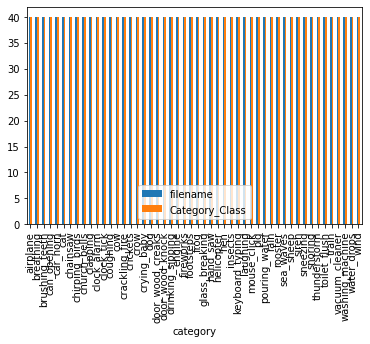

In [26]:
#Checking the balance in the data 
# Checking if the dataset is balanced

count_category = ESData_C.groupby('category').count()
count_category.plot(kind="bar")

In [27]:
#Create samples to check the method  
filename_engine = ESData_C[ESData_C['category']=='engine'].iloc[1]["filename"]
filename_clocktick = ESData_C[ESData_C['category']=='clock_tick'].iloc[0]["filename"]

#listening to one of the audio files
#ipd.Audio('/home/hood/My repo/Strive-Capestone/Data/archive/audio/audio/'+ filename_clocktick)

In [28]:
wav1, sr1 = librosa.load('/home/hood/My repo/Strive-Capestone/Data/archive/audio/audio/'+ filename_engine)
wav2, sr2 =librosa.load('/home/hood/My repo/Strive-Capestone/Data/archive/audio/audio/'+ filename_clocktick, sr = None)



/tmp/ipykernel_55874/2903615205.py:1: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(wav2, sr2)


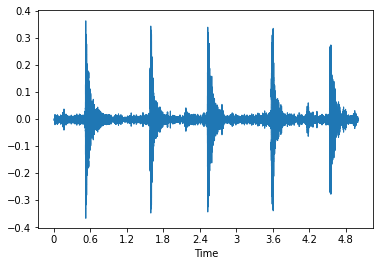

In [29]:
librosa.display.waveshow(wav2, sr2)

/tmp/ipykernel_55874/2948661170.py:1: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(wav1, sr1)


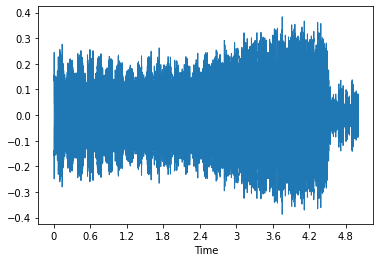

In [30]:
librosa.display.waveshow(wav1, sr1)

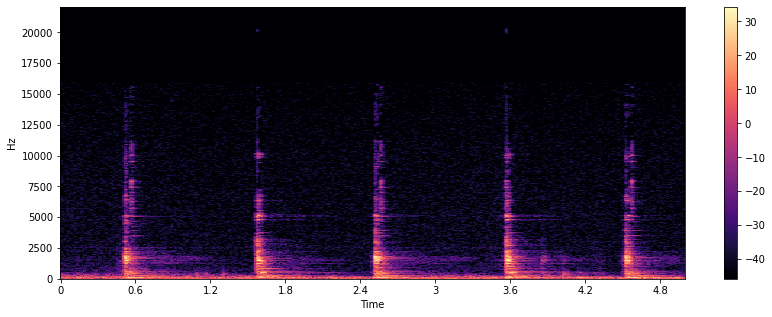

In [31]:
#sound to spectrum of it's wave 
#checking code with individual audio

X = librosa.stft(wav2)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar()

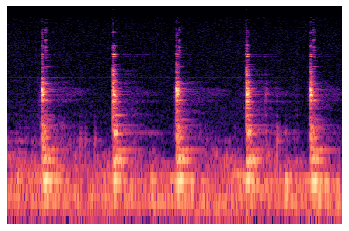

In [32]:
#Normalizing the spectrum image 

fig = plt.figure()
plt.axis('off')
librosa.display.specshow(Xdb, sr=sr2, x_axis='time', y_axis='log')
fig.savefig('../Strive-Capestone/testNormalizizeSpectrum.png')

In [37]:
#Get All wavesSpectrum into folders by category ready to Pytorch

def audio2wvimg(filename, category):
    #Load Audio
    wav, sr = librosa.load('../Strive-Capestone/Data/archive/audio/audio/'+ filename)
    librosa.display.waveshow(wav, sr)
    #plt.colorbar()
    plt.close()
    #
    #KFig = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    #fig, ax = plt.subplots()
    #img = librosa.display.waveshow(wav, s)
    #fig.colorbar(img, ax=ax)
    # im1 = librosa.display.waveshow(wav, sr)
    #fig.colorbar(img, ax=ax)
    #fig.colorbar()
    #fig.close()
    

    # Generate spectram
    X = librosa.stft(wav)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #im = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.close()

    #rename imagge file 
    
    Xtn = filename.replace("wav","png")

    fig = plt.figure()
    plt.axis('off')
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    fig.savefig('/home/hood/My repo/ESD/{}/{}'.format(str(category), Xtn))
    plt.close()


In [42]:
for index, row in ESData_C.iterrows():
    audio2wvimg(row["filename"], row["category"])

/tmp/ipykernel_55874/2023085063.py:6: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(wav, sr)
/tmp/ipykernel_55874/2023085063.py:6: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(wav, sr)
/tmp/ipykernel_55874/2023085063.py:6: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(wav, sr)
/tmp/ipykernel_55874/2023085063.py:6: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(wav, sr)
/tmp/ipykernel_55874/2023085063.py:6: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(wav, sr)
